In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
path='https://raw.githubusercontent.com/bot13956/weather_pattern/master/weather_data.csv'
df=pd.read_csv(path)
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
#convert temperature from tenths of degree C to degree C
df['Data_Value']=0.1*df.Data_Value

In [13]:
days=list(map(lambda x: x.split('-')[-2]+'-'+x.split('-')[-1], df.Date))
years=list(map(lambda x: x.split('-')[0], df.Date))


In [6]:
df['Days']=days
df['Years']=years

In [14]:
df.head()

,ID,Date,Element,Data_Value,Days,Years
0,USW00094889,2014-11-12,TMAX,2.2,11-12,2014
1,USC00208972,2009-04-29,TMIN,5.6,04-29,2009
2,USC00200032,2008-05-26,TMAX,27.8,05-26,2008
3,USC00205563,2005-11-11,TMAX,13.9,11-11,2005
4,USC00200230,2014-02-27,TMAX,-10.6,02-27,2014


In [7]:
df_2005_to_2014=df[(df.Days!='02-29')&(df.Years!='2015')]
df_2015=df[(df.Days!='02-29')&(df.Years=='2015')]

In [8]:
df_max=df_2005_to_2014.groupby(['Element','Days']).max()
df_min = df_2005_to_2014.groupby(['Element','Days']).min()
df_2015_max=df_2015.groupby(['Element','Days']).max()
df_2015_min = df_2015.groupby(['Element','Days']).min()

In [9]:
record_max=df_max.loc['TMAX'].Data_Value
record_min=df_min.loc['TMIN'].Data_Value
record_2015_max=df_2015_max.loc['TMAX'].Data_Value
record_2015_min=df_2015_min.loc['TMIN'].Data_Value

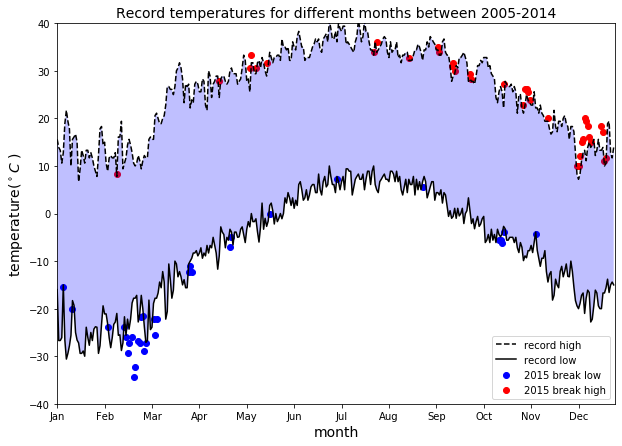

In [10]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(record_max)),record_max, '--k', label="record high")
plt.plot(np.arange(len(record_max)),record_min, '-k',label="record low")
plt.scatter(np.where(record_2015_min < record_min.values),
            record_2015_min[record_2015_min < record_min].values,c='b',label='2015 break low')
plt.scatter(np.where(record_2015_max > record_max.values),
            record_2015_max[record_2015_max > record_max].values,c='r',label='2015 break high')
plt.xlabel('month',size=14)
plt.ylabel('temperature($^\circ C$ )',size=14)
plt.xticks(np.arange(0,365,31), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax=plt.gca()
ax.axis([0,365,-40,40])
plt.gca().fill_between(np.arange(0,365), 
                       record_min, record_max, 
                       facecolor='blue', 
                       alpha=0.25)
plt.title('Record temperatures for different months between 2005-2014',size=14)
plt.legend(loc=0)

plt.show()